<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">TABLE OF CONTENTS</div>

* &nbsp; **[Used Libraries](#USED-LIBRARIES)**

* &nbsp; **[Load and Check Data](#LOAD-AND-CHECK-DATA)**

* &nbsp; **[Data Cleaning](#DATA-CLEANING)**

* &nbsp; **[Understanding the Shape of Data](#UNDERSTANDING-THE-SHAPE-OF-DATA)**

* &nbsp; **[Profit, Sales & Discount Overview](#profit-sales-discount-overview)**

* &nbsp; **[TIME SERIESE ANALYSIS](#TIME-SERIESE-ANALYSIS)**
 

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">USED LIBRARIES</div>


*  **Numpy** (link: [numpy.org](https://numpy.org/))
*  **Pandas** (link: [pandas.pydata.org](https://pandas.pydata.org/))
*  **Plotly** (link: [plotly.com](https://plotly.com/))

In [3]:
import pandas as pd
import chardet
import plotly.express as px

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">LOAD AND CHECK DATA</div>

In [4]:
with open("../datasets/superstore.csv", 'rb') as f:
    result = chardet.detect(f.read())
print(result)
df = pd.read_csv("../datasets/Superstore.csv", encoding=result['encoding'])

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [66]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
def check_columns(df):
    """
    print number of unique values for each column in [data] 
    """
        
    for column in df.columns:
        print("Column Name:", column+";", "Number of Unique Values:", len(df[column].unique()))
        
check_columns(df)

Column Name: Row ID; Number of Unique Values: 9994
Column Name: Order ID; Number of Unique Values: 5009
Column Name: Order Date; Number of Unique Values: 1237
Column Name: Ship Date; Number of Unique Values: 1334
Column Name: Ship Mode; Number of Unique Values: 4
Column Name: Customer ID; Number of Unique Values: 793
Column Name: Customer Name; Number of Unique Values: 793
Column Name: Segment; Number of Unique Values: 3
Column Name: Country; Number of Unique Values: 1
Column Name: City; Number of Unique Values: 531
Column Name: State; Number of Unique Values: 49
Column Name: Postal Code; Number of Unique Values: 631
Column Name: Region; Number of Unique Values: 4
Column Name: Product ID; Number of Unique Values: 1862
Column Name: Category; Number of Unique Values: 3
Column Name: Sub-Category; Number of Unique Values: 17
Column Name: Product Name; Number of Unique Values: 1850
Column Name: Sales; Number of Unique Values: 5825
Column Name: Quantity; Number of Unique Values: 14
Column Na

In [7]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Inference:

* **Data is quite clear, no null values found.**
* **There are 2 int64 columns ("Quantity" and "Postal Code")**
* **There are 3 float64 columns ("Sales", "Discount", "Profit")**
* **There are 15 object columns.**


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA CLEANING</div>

#### Drop duplicated data

In [103]:
print(f'Sum of Suplicate data : {df.duplicated().sum()}')

sum of Suplicate data : 0


In [73]:
# drop unnecessary columns
df = df.drop(columns=["Country", "Customer Name",'Postal Code'])

## Inference:

* **We need to reconsider whether we need such columns as:**
    * **Country - There is only one unique value.**
    * **Customer Name - We have column "Customer ID", therefore there is no need for this column.**
    * **postal code - we have column name 'Postal code' as of now we don't need this column**

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">UNDERSTANDING THE SHAPE OF DATA</div>

#### Custom colors

In [13]:
colors = ['#1192AA','#00B8C0', '#73D4D3', '#90F2F0']

### States

In [14]:
all_states = df['State'].unique()
all_states

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [15]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [16]:
data = df

In [17]:
import plotly.graph_objects as go


data['State_abb'] = data['State'].replace(us_state_to_abbrev)


state_order_counts = data['State_abb'].value_counts().reset_index()
state_order_counts.columns = ['State_abb', 'Order_Count']


fig = go.Figure(data=go.Choropleth(
    locations = state_order_counts['State_abb'],
    z = state_order_counts['Order_Count'],
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 1000,
    colorbar_title = "Orders"
))

fig.update_layout(
   height=500,
    width=1000 ,
    title = {
        'text': "Number of Orders by State (US Map)",
        'y': 0.95,
        'x': 0.5,
    },
    geo_scope='usa',
    font=dict(size=14)
)

fig.show(config={
    'scrollZoom': False,
  
})


#### Ship Mode

In [18]:
fig = px.bar(x = df['Ship Mode'].value_counts().index, y = df['Ship Mode'].value_counts(),
             color = df['Ship Mode'].value_counts().index,
              template = 'simple_white',color_discrete_sequence = colors)


fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Orders",
    showlegend = False,
    height=500,
    width=1000 ,
    font = dict(size = 14),    
    title={
        'text': "Frequency of Orders by Shipping Modes",
        'y':0.96,
        'x':0.5
        }
    )



fig.show()

### Segments

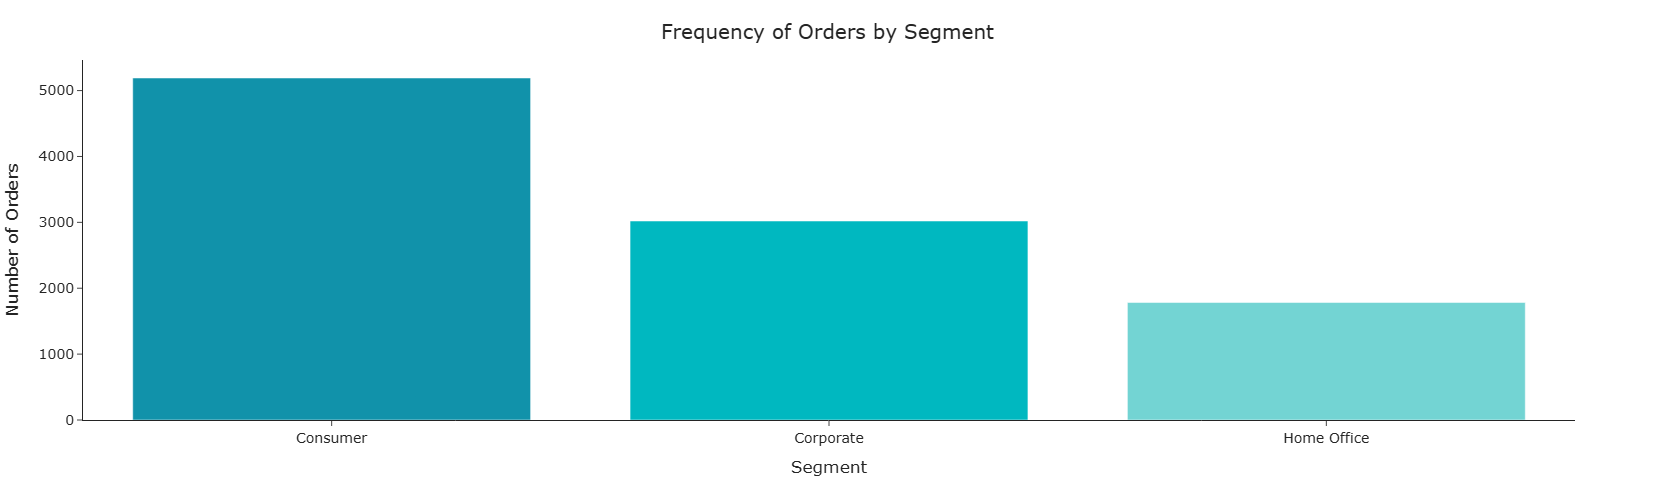

In [19]:
fig = px.bar(x = df['Segment'].value_counts().index, y = df['Segment'].value_counts(),
             color = df['Segment'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)


fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Number of Orders",
    showlegend = False,
    height=500,
    width=1000 ,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Segment",
        'y':0.95,
        'x':0.5
        }
    )



fig.show()

### REgion

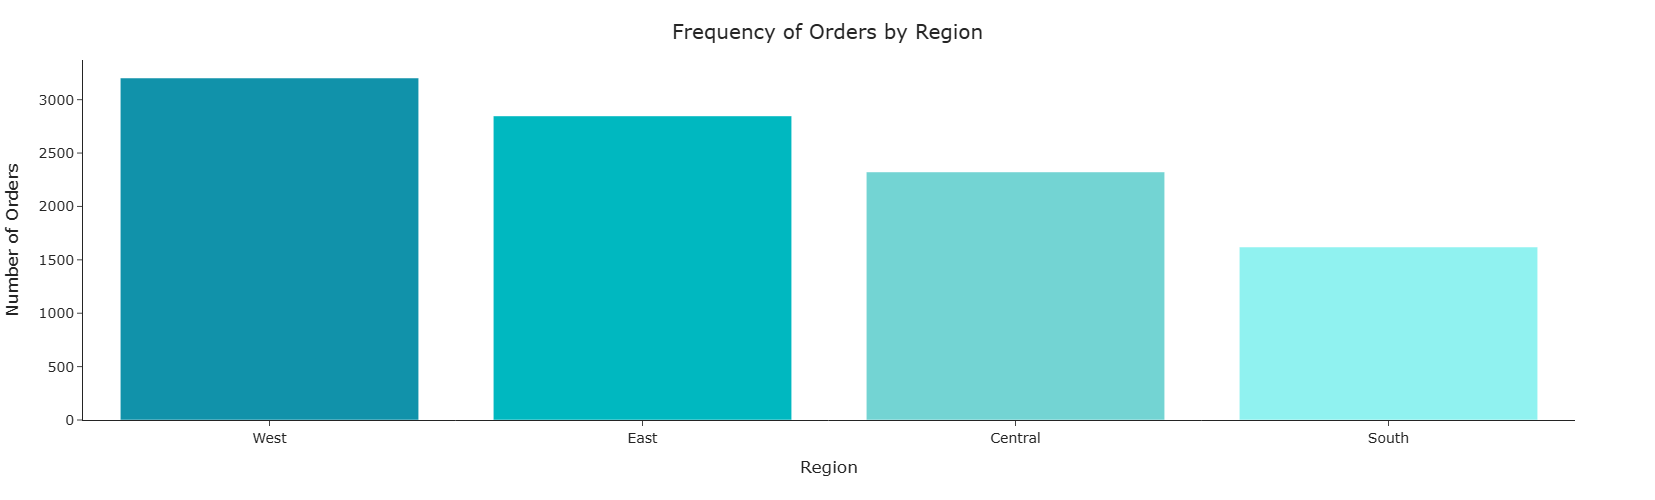

In [20]:
fig = px.bar(x = df['Region'].value_counts().index, y = df['Region'].value_counts(),
             color = df['Region'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)


fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Orders",
    showlegend = False,
    height=500,
    width=1000 ,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Region",
        'y':0.95,
        'x':0.5
        }
    )



fig.show()

### Category

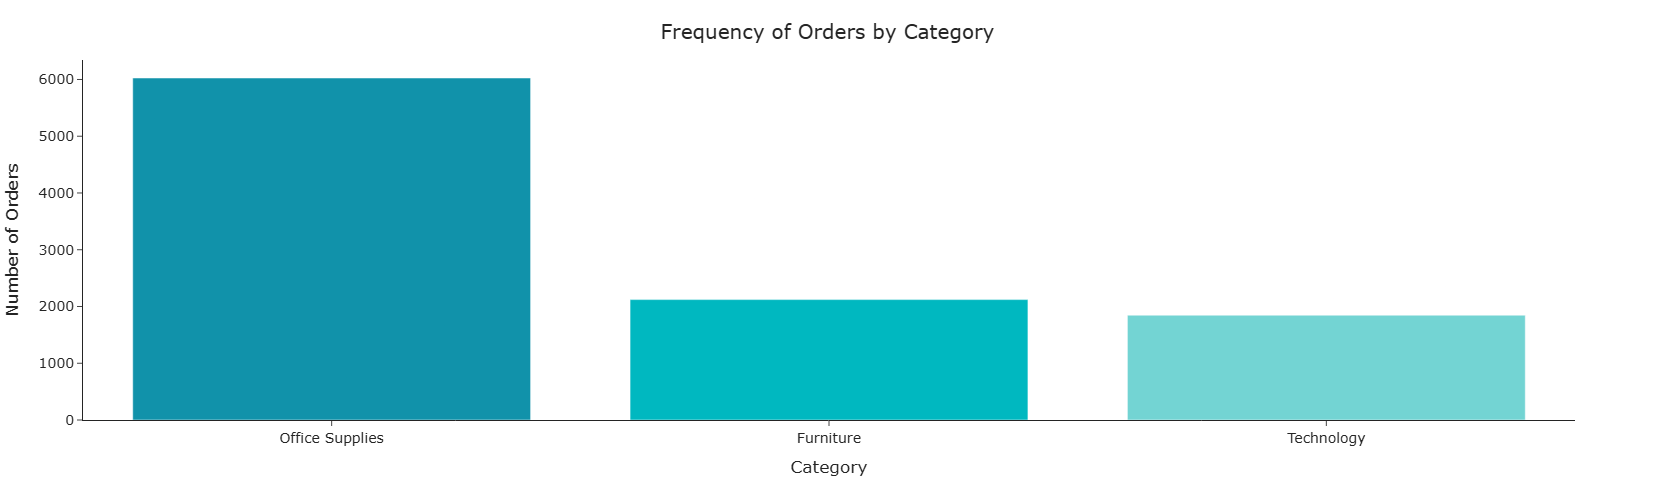

In [21]:
fig = px.bar(x = df['Category'].value_counts().index, y = df['Category'].value_counts(),
             color = df['Category'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)


fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    showlegend = False,
     height=500,
    width=1000 ,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Category",
        'y':0.95,
        'x':0.5
        }
    )



fig.show()

### Sub Category

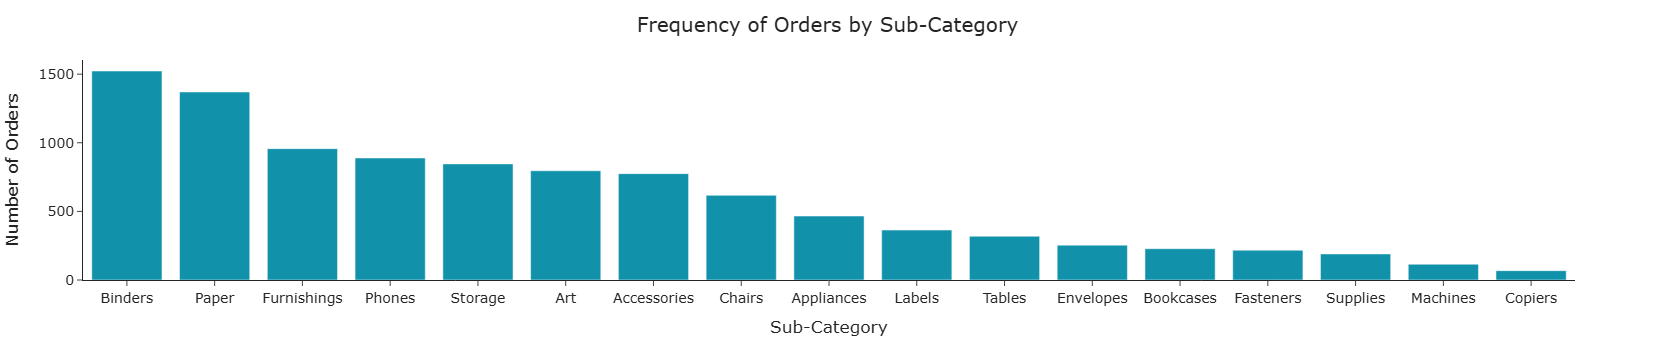

In [22]:
fig = px.bar(x = df['Sub-Category'].value_counts().index, y = df['Sub-Category'].value_counts(),
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

## Inference
* **Three most popular states among the customers are California, New York and Texas.**
* **Majority of the customers prefer the Standard Class Shipping mode.**
* **Most of the customers are from Consumer Segment.**
* **Least of all orders from the southern region.**
* **Office Supplies take up most of the sales.**
* **Blinders and Paper are clear leaders in sales among customers.**


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">profit-sales-discount-overview</div>

In [23]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")


Total Sales: $2,297,200.86


In [24]:
# profit after dicount
total_profits = df['Profit'].sum()
print(f"total profits: ${total_profits:,.2f}")

total profits: $286,397.02


In [25]:
average_discount = df['Discount'].mean()

print(f"average discount : {average_discount*100:,.4f}%")

average discount : 15.6203%


In [26]:
# now we calculate discount given in $
print(total_sales)
spent_on_discount = (2297200.8603 * 15.62)/84.38
print(f"spent_on_discount : ${spent_on_discount:,.2f}")

2297200.8603
spent_on_discount : $425,246.24


In [27]:
total_quantity = df['Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity:,} Units")

Total Quantity Sold: 37,873 Units


In [29]:

unique_customers = df['Customer ID'].nunique()
print(f"Number of Unique Customers: {unique_customers}")

unique_orders = df['Order ID'].nunique()
print(f"Number of Unique Orders: {unique_orders}")


Number of Unique Customers: 793
Number of Unique Orders: 5009


In [30]:
df['Region'].nunique()

4

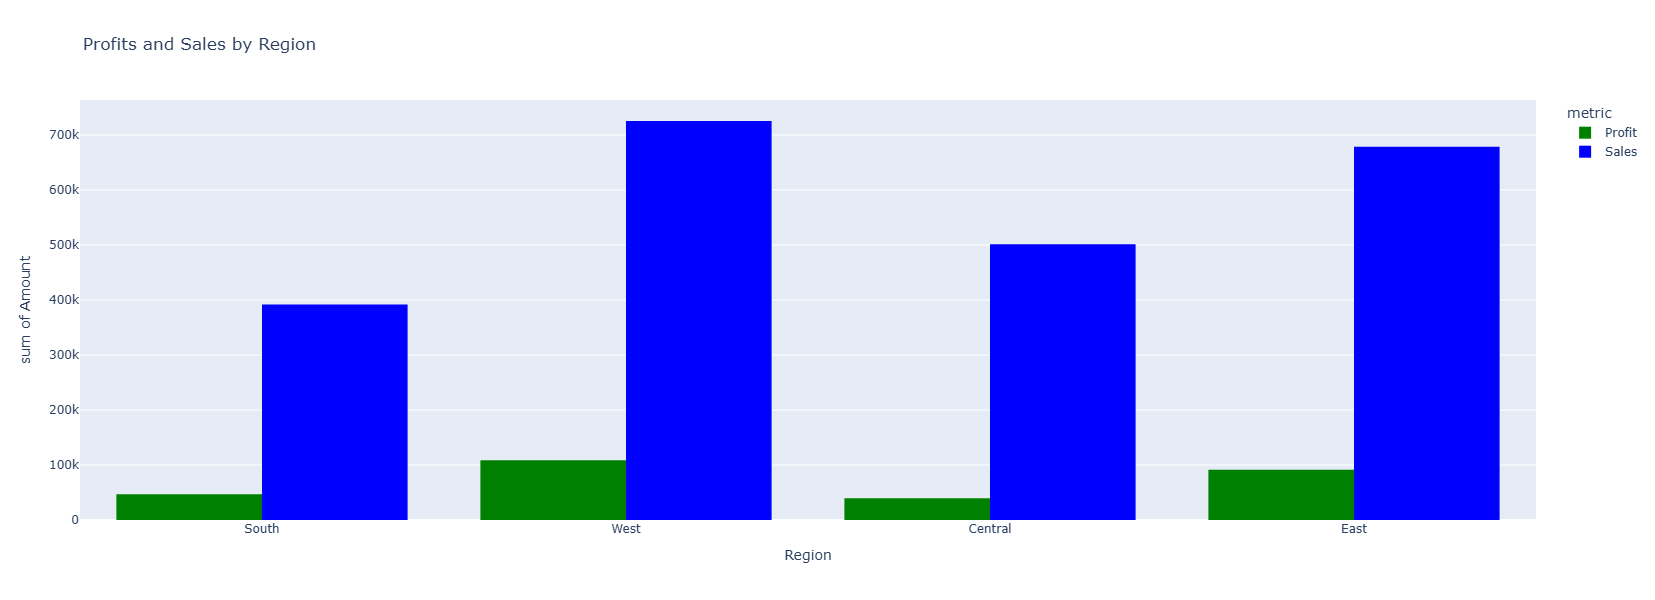

In [31]:
 ## convert normal dataframe to long bcz graoh only read this type of format.

df_long = df.melt(id_vars=['Region'], # id_vars used to define column which is remain same       
                  value_vars=['Profit', 'Sales'],   ## value_vars used to unpivot columns
                  var_name='metric',              ## this will create new column only for this plot 
                  value_name='Amount')         ## name of new column which hold numeric values

color_map = {
    'Profit': 'green',
    'Sales': 'blue'
}


fig = px.histogram(df_long,  
             x='Region',    
             y='Amount',    
             color='metric',  
             barmode='group',   
             title='Profits and Sales by Region',   
             color_discrete_map=color_map)     
fig.update_layout(
    height=600,
    width=1200  
)

fig.show()

In [32]:
### category wise sales and profits
category_stats = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)

In [33]:
nbins = len(df['Sub-Category'].unique())

17

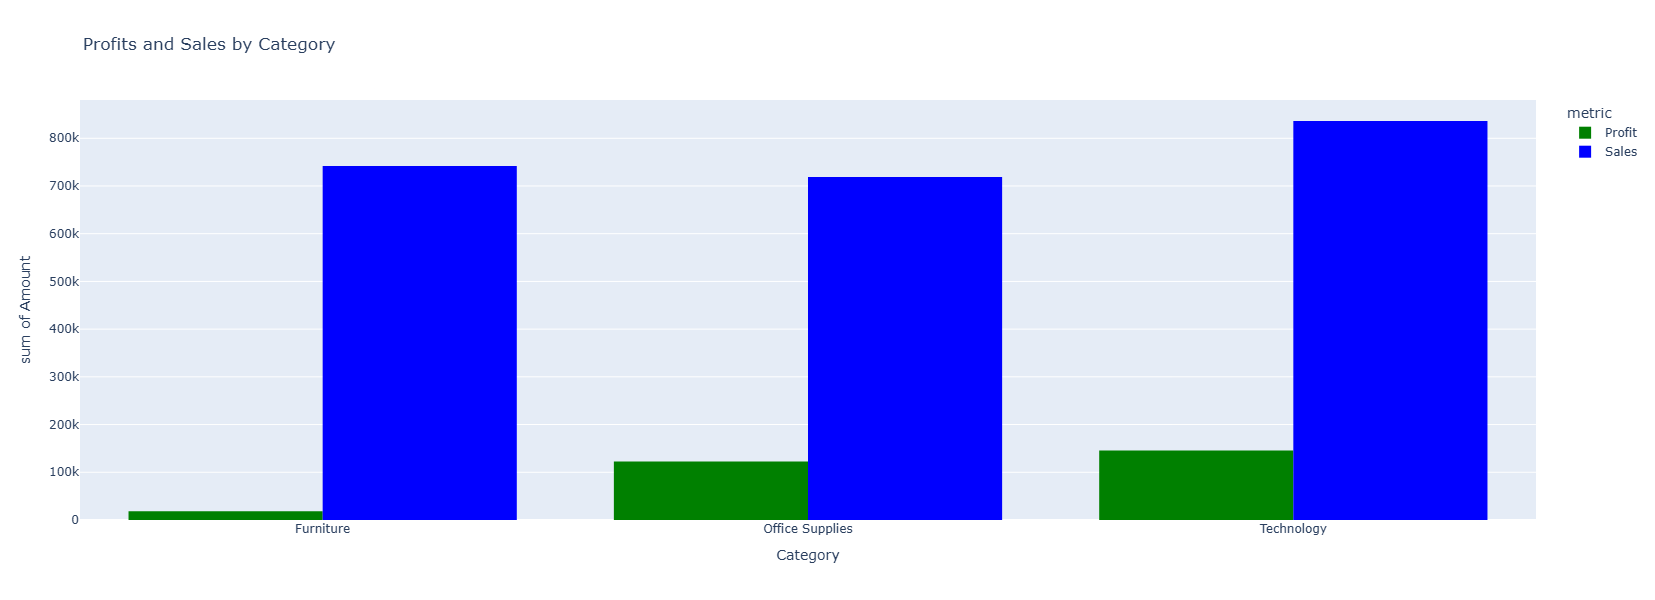

In [34]:
df_convert = df.melt(id_vars=['Category'],
                     value_vars=['Profit', 'Sales'],   
                      var_name='metric',            
                      value_name='Amount')
color_map = {
    'Profit': 'green',
    'Sales': 'blue'
}
fig = px.histogram(df_convert,  
             x='Category',    
             y='Amount',    
             color='metric',  
             barmode='group',   
             title='Profits and Sales by Category',
            color_discrete_map=color_map)
fig.update_layout(
    height=600,
    width=1300 
)

fig.show()
                   

In [35]:
## Sub-Category wise profit percentage....................
subcat = df.groupby(['Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()  # here reset_index is very imp, bcz sub_cat is not dataset column so reset index provide index and later it considered as column 


subcat['Profit %'] = (subcat['Profit'] / subcat['Sales']) * 100

subcat_formatted = subcat.copy()
subcat_formatted = subcat_formatted.sort_values(by='Profit %', ascending=False)
subcat_formatted['Profit %'] = subcat_formatted['Profit %'].map('{:,.2f}'.format)


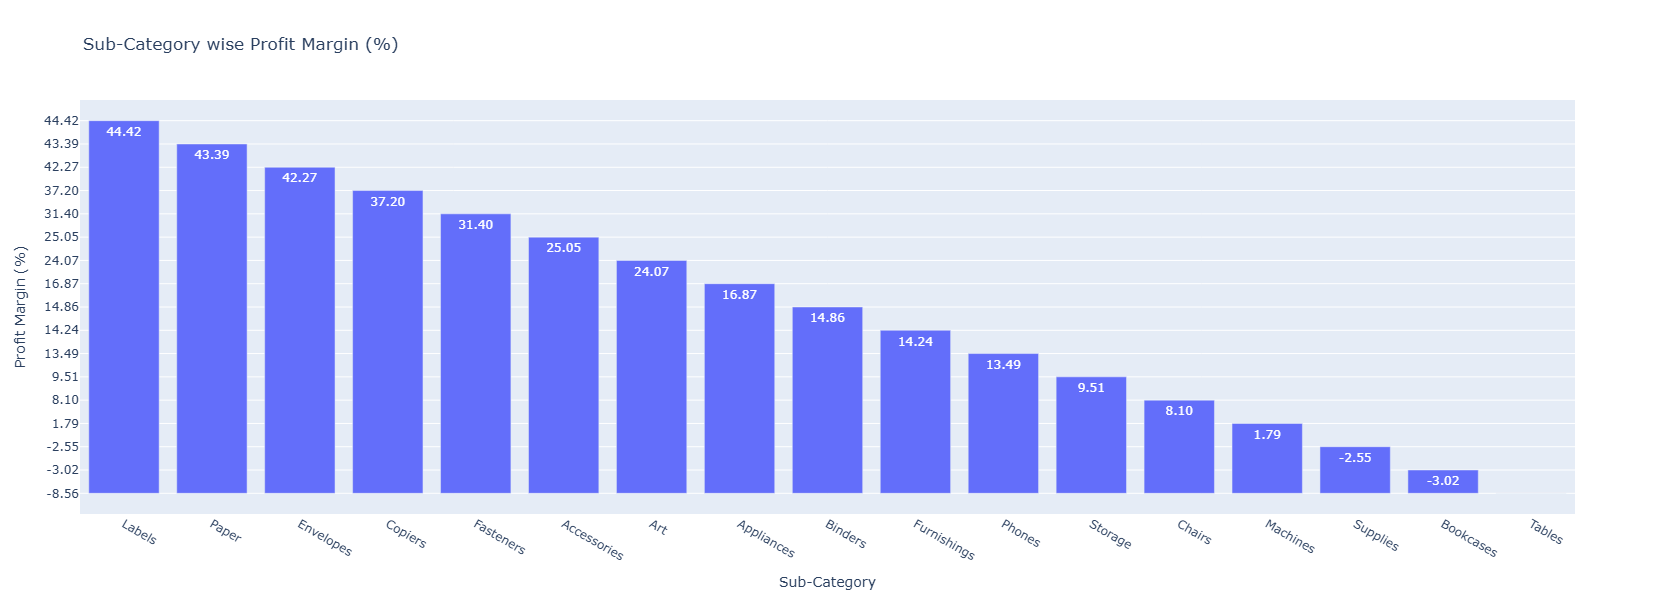

In [36]:
fig = px.bar(subcat_formatted,  
             y='Profit %',
             x='Sub-Category',   
             title='Sub-Category wise Profit Margin (%)',
             text='Profit %')  
        
fig.update_layout(
    height=600,
    width=1600,
    xaxis_tickangle=30,
    yaxis_title='Profit Margin (%)',
    yaxis={'categoryorder': 'total descending'}
)
fig.show()

In [37]:
## by Ship mode, profit and sales

df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [38]:
shipmode_wise = df.groupby(['Ship Mode']).agg({'Sales': 'sum', 'Profit': 'sum'})

# converted scientific format to string for better represantation......
shipmode_wise_formatted = shipmode_wise.copy()
shipmode_wise_formatted['Sales'] = shipmode_wise_formatted['Sales'].map('{:,.2f}'.format)
shipmode_wise_formatted['Profit'] = shipmode_wise_formatted['Profit'].map('{:,.2f}'.format)

print(shipmode_wise_formatted)


                       Sales      Profit
Ship Mode                               
First Class       351,428.42   48,969.84
Same Day          128,363.12   15,891.76
Second Class      459,193.57   57,446.64
Standard Class  1,358,215.74  164,088.79


In [39]:
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [40]:
shipmode_wise = df.groupby(['Segment']).agg({'Sales': 'sum', 'Profit': 'sum'})

# converted scientific format to string for better represantation......
shipmode_wise_formatted = shipmode_wise.copy()
shipmode_wise_formatted['Sales'] = shipmode_wise_formatted['Sales'].map('{:,.2f}'.format)
shipmode_wise_formatted['Profit'] = shipmode_wise_formatted['Profit'].map('{:,.2f}'.format)

print(shipmode_wise_formatted)

                    Sales      Profit
Segment                              
Consumer     1,161,401.34  134,119.21
Corporate      706,146.37   91,979.13
Home Office    429,653.15   60,298.68


In [41]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,State_abb
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,KY
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,KY
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,CA
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,FL
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,FL


## Inference
* **The West and East regions were the top contributors in both total spending and profitability.** 

* **The Technology category outperformed others, leading in both sales volume and profit.**

* **Paper and Envelopes sub-categories achieved profit margins above 40%, indicating strong product performance.**

* **The Standard Class shipping mode is clearly preferred by customers, accounting for three times more sales and profit than other shipping methods.**

* **The Consumer segment generated the highest revenue and profit, compared to Corporate and Home Office segments.**


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">TIME SERIESE ANALYSIS</div>

In [59]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
    
df['Order Date'].dtype # ir should 'ns'

dtype('<M8[ns]')

In [60]:

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()  # e.g., January
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%b')
df['YearMonth'] = pd.to_datetime(df['Year-Month'], format='%Y-%b')


trends = df.groupby(['YearMonth','Year-Month']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
    # .sort_values(by='Profit', ascending=False)


monthly_trends = trends.copy()
# monthly_trends['Profit'] =  monthly_trends['Profit'].map('{:,.2f}'.format)


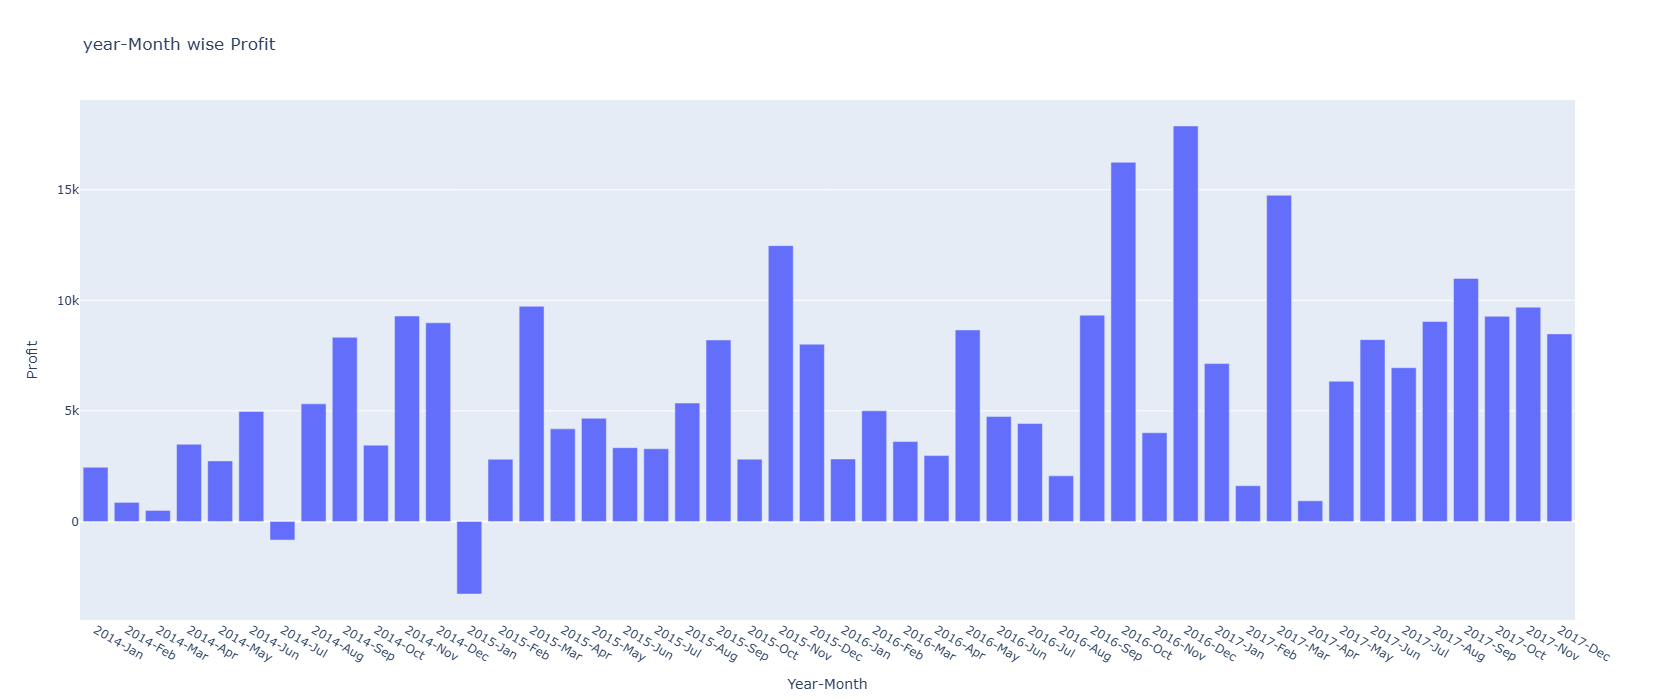

In [61]:
fig = px.bar(monthly_trends,  
             y='Profit',
             x='Year-Month',   
             title='year-Month wise Profit',
             )
fig.update_layout(
    height=700,
    width=1500,
    xaxis_tickangle=30,
    # yaxis_title='Profit Margin (%)',
    yaxis={'categoryorder': 'trace'}

)
fig.show()

In [62]:
## year wise trand analysis
yearly_trands = df.groupby(['Year']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index().sort_values('Profit', ascending=False)
print(yearly_trands)

   Year        Sales      Profit
3  2017  733215.2552  93439.2696
2  2016  609205.5980  81795.1743
1  2015  470532.5090  61618.6037
0  2014  484247.4981  49543.9741


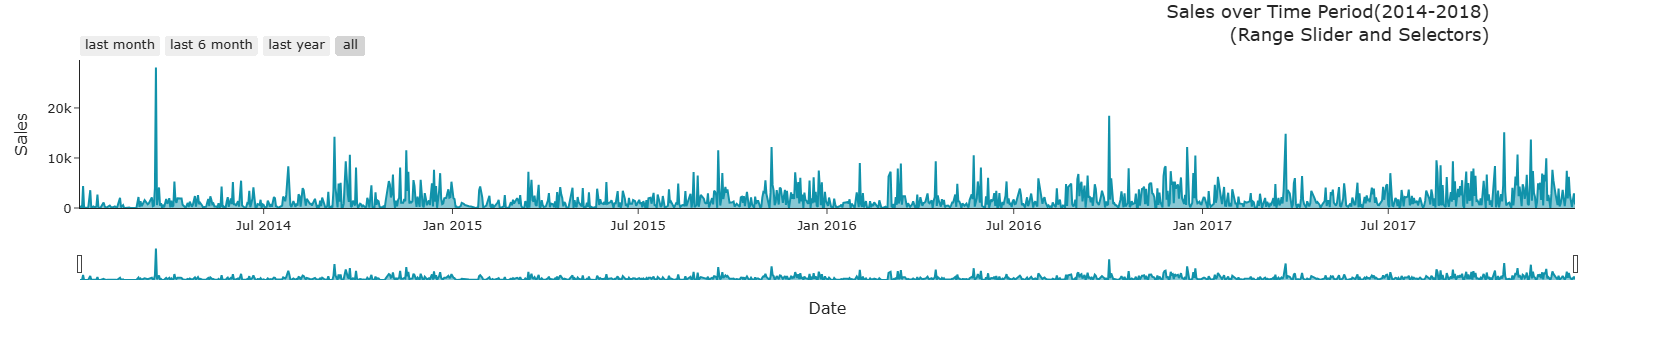

In [63]:
data_timeseries = df.copy()
data_timeseries = data_timeseries[['Order Date', 'Sales', 'Profit']].groupby('Order Date', as_index = False).sum()

data_timeseries['Order Date'] = pd.to_datetime(data_timeseries['Order Date'])

data_timeseries = data_timeseries.sort_values(by = 'Order Date')

fig = px.area(x = data_timeseries['Order Date'],
              y = data_timeseries['Sales'],
              template = 'simple_white',
              color_discrete_sequence = colors,
             )

fig.update_layout(
    yaxis_title = "Sales",
    xaxis_title="Date",
    font = dict(
            size = 13
            ),    
    title={
        'text': "Sales over Time Period(2014-2018)<br>(Range Slider and Selectors)",
        'y':0.95,
        'x':0.9
        },
    template = 'simple_white'
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="last month", step="month", stepmode="backward"),
            dict(count=6, label="last 6 month", step="month", stepmode="backward"),
            dict(count=1, label="last year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

### Yearly Order analysis

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
    
df['Order Date'].dtype # it should 'ns'

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()  # e.g., January
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%b')
df['date'] = pd.to_datetime(df['Year-Month'], format='%Y-%b')

trends = df.groupby(['date','Year','Month']).agg({'Order ID': 'count'}).reset_index()

monthly_trends = trends.copy()
# monthly_trends['Profit'] =  monthly_trends['Profit'].map('{:,.2f}'.format)


In [6]:
heatmap_data = monthly_trends.pivot(index='Year', columns='Month', values='Order ID')
heatmap_data = heatmap_data.reset_index().melt(id_vars='Year', var_name='Month', value_name='order')

In [ ]:
heatmap_data

,Year,Month,order
0,2014,April,135
1,2015,April,160
2,2016,April,170
3,2017,April,203
4,2014,August,153
5,2015,August,159
6,2016,August,176
7,2017,August,218
8,2014,December,278
9,2015,December,316


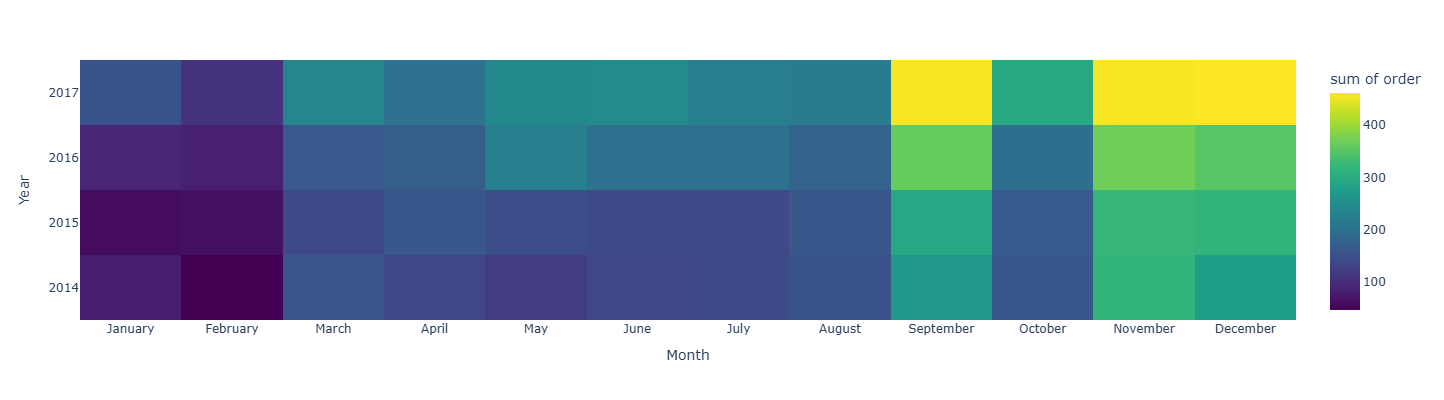

In [101]:
heatmap_data = monthly_trends.pivot(index='Year', columns='Month', values='Order ID')
heatmap_data = heatmap_data.reset_index().melt(id_vars='Year', var_name='Month', value_name='order')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

Year_order = ['2014','2015','2016','2017']

fig = px.density_heatmap(heatmap_data, x='Month', y='Year', z='order', 
                         color_continuous_scale='Viridis',
                        category_orders={'Month': month_order, 'Year':Year_order},)

fig.update_layout(
    height=400,
    width=1400,

)
fig.show()

In [99]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['weekday'] = df['Order Date'].dt.day_name()

df['Average Delivery Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

average_delivery_time = df['Average Delivery Time (Days)'].mean()
print(f"Average Delivery Time : {average_delivery_time:,.2f} Days")

delivery_time = df.groupby(['Year-Month','weekday']).agg({'Average Delivery Time (Days)':'mean'}).reset_index()

Average Delivery Time : 3.96 Days


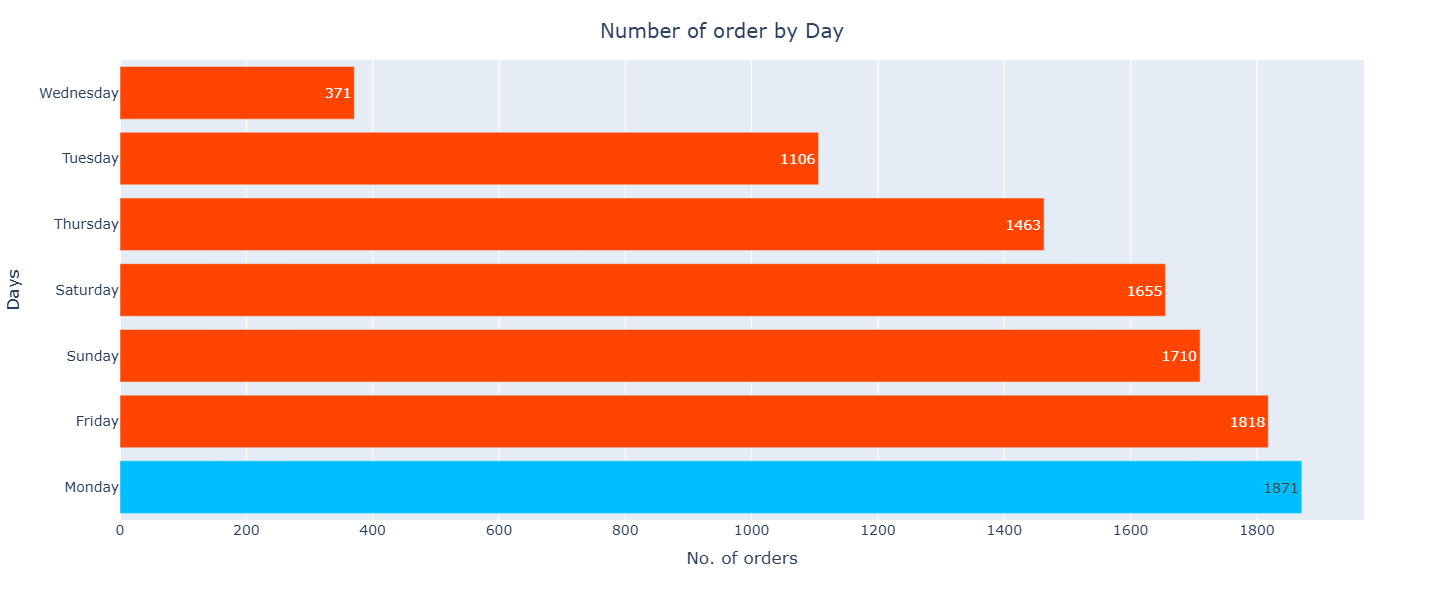

In [97]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['weekday'] = df['Order Date'].dt.day_name()

most_busy_day = df['weekday'].value_counts()

color = ['#FF4500']*30
color[0] = '#00BFFF' 

fig = px.bar(
    x=most_busy_day.values,       
    y=most_busy_day.index,
    text = most_busy_day.values, 
    orientation='h')

fig.update_traces(marker_color=color)
fig.update_layout(
    xaxis_title="No. of orders",
    yaxis_title="Days",
    showlegend = False,
    height=600,
    width=1300,
    font = dict(size = 14),    
    title={
        'text': "Number of order by Day",
        'y':0.96,
        'x':0.5
        }
    )
fig.show()

### What we Get
* **here we can see that every year November, december, september has highest order**       
* **january has lowest order rate every year**
* **here we get hidden pattern for number of order that is we get septmber, november and december.**
* **as we can see in graph, we get high nomber of order at monday.**